<a href="https://colab.research.google.com/github/lucianomattar/Arcevo-R/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np #importa bib para manip de matrizes
from matplotlib import pyplot as plt #bib para criação de graf
#inicio keras
from keras.datasets import mnist #dataset mnist
from keras.models import Sequential #modelo sequencial
from keras.layers import Dense, InputLayer #camada totalmente conectada
from keras.layers import Dropout #estrutura de dropout
from keras.utils import np_utils #bib de utilidades do keras


(60000, 28, 28)


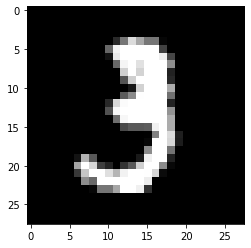

3


In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #importa dataset mnist do kera
print(x_train.shape)

first_image = x_train[10] #imagem de treino indice 100

first_image = np.array(first_image, dtype = 'float') #realiza manip dos dados da image
pixels = first_image.reshape((28,28))

plt.imshow(pixels, cmap='gray')#exibe a imagem do vetor
plt.show()

print(y_train[10])#imprime classe da imagem de treino 1000

In [ ]:
num_pixels = x_train.shape[1]*x_train.shape[2] #calcula o total de pixels da imagem
print(num_pixels)

#transforma os valores dos pixels para float32
x_train2 = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test2 = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

print(x_train.shape)
print(x_train2.shape)
print(x_train2)

#normalizando os valores dos pixels entre 0 e 1
x_train2 = x_train2/255
x_test2 = x_test2/255

print(x_train2[1000])

In [ ]:
#transforma os y em one-hot vector
print(y_train)
print(y_train.shape)

print(y_test)
print(y_test.shape)

y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

print('a')
print(y_train_h)
print(y_train_h.shape)

print('b')
print(y_test_h)
print(y_test_h.shape)

#contem o numero de classes do problema
num_classes = y_test_h.shape[1]
print(num_classes)


In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = num_pixels))
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) #cria camada de entrada
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) #cria a segunda camada
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #cria a camada de saída

model.summary()#imprime informaçoes sobre o modelo


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy']) #compila o modelo
result=model.fit(x_train2, y_train_h, validation_data=(x_test2, y_test_h), epochs=20, verbose=1, batch_size = 100)

In [29]:
x= x_train2[1001]
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

print(model.predict(x))
print(np.argmax(model.predict(x)))

(784,)
(1, 784)
[[2.61783850e-14 3.11303243e-14 2.46004668e-15 3.63800909e-19
  3.83459792e-07 2.37149328e-10 2.88239992e-16 9.99999523e-01
  7.72429528e-18 1.09441004e-07]]
7
